In [131]:
import pandas as pd
import matplotlib.pyplot as plt
# import panel as pn
import plotly.express as px
import plotly.io as pio
import datetime as dt

# pn.extension('plotly')
# import hvplot.pandas
# pd.options.display.float_format = '{:.6f}%'.format


In [132]:
df = pd.read_csv('NCDHHS_7-9-20.csv')
df


,Living_Situation,Cases,Deaths
0,Nursing Home,4667,680
1,Residential Care Facility,1362,119
2,Correctional Facility,1764,31
3,Other,413,5
4,Not in a Congregate Living,39625,441
5,Missing Data,29479,165


In [133]:
df.set_index('Living_Situation',inplace=True)

In [134]:
df['Congregate_Living']=['Congregate Living', 'Congregate Living', 'Congregate Living','Not in Congregate Living', 'Not in Congregate Living', 'Not in Congregate Living']
df

,Cases,Deaths,Congregate_Living
Living_Situation,,,
Nursing Home,4667,680,Congregate Living
Residential Care Facility,1362,119,Congregate Living
Correctional Facility,1764,31,Congregate Living
Other,413,5,Not in Congregate Living
Not in a Congregate Living,39625,441,Not in Congregate Living
Missing Data,29479,165,Not in Congregate Living


In [135]:
df['%ofDeaths'] = df.Cases / df.Deaths.sum()
df['%TotalDeaths'] = df.Deaths/df.Deaths.sum() 


In [136]:
# As of 2019 NC total population is 10.49 million
population = 10500000
df['%TotalPopulation'] = (df.Deaths/population) 
df['%TotalCases'] = df.Cases/df.Cases.sum() 
df['%TotalPop/Cases'] = (df.Cases/population) 
df

,Cases,Deaths,Congregate_Living,%ofDeaths,%TotalDeaths,%TotalPopulation,%TotalCases,%TotalPop/Cases
Living_Situation,,,,,,,,
Nursing Home,4667,680,Congregate Living,3.238723,0.471895,6.476190e-05,0.060367,0.000444
Residential Care Facility,1362,119,Congregate Living,0.945177,0.082582,1.133333e-05,0.017617,0.000130
Correctional Facility,1764,31,Congregate Living,1.224150,0.021513,2.952381e-06,0.022817,0.000168
Other,413,5,Not in Congregate Living,0.286607,0.003470,4.761905e-07,0.005342,0.000039
Not in a Congregate Living,39625,441,Not in Congregate Living,27.498265,0.306037,4.200000e-05,0.512547,0.003774
Missing Data,29479,165,Not in Congregate Living,20.457321,0.114504,1.571429e-05,0.381309,0.002808


In [137]:
df_grouped = df.groupby('Congregate_Living').sum()
df_grouped

,Cases,Deaths,%ofDeaths,%TotalDeaths,%TotalPopulation,%TotalCases,%TotalPop/Cases
Congregate_Living,,,,,,,
Congregate Living,7793,830,5.408050,0.575989,0.000079,0.100802,0.000742
Not in Congregate Living,69517,611,48.242193,0.424011,0.000058,0.899198,0.006621


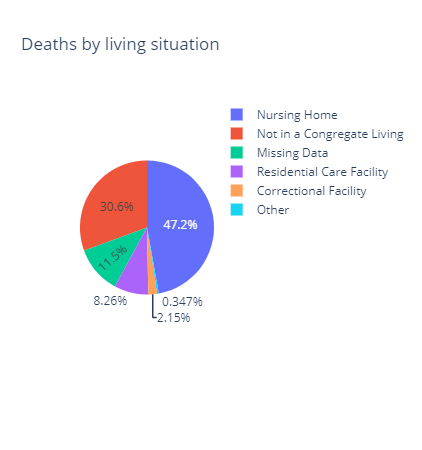

In [138]:
fig = px.pie(df.reset_index(), values='Deaths',names = 'Living_Situation', title='Deaths by living situation')
fig.show()

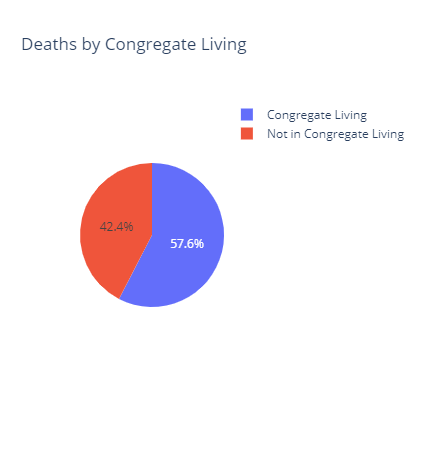

In [139]:
fig = px.pie(df_grouped.reset_index(), values='Deaths',names = 'Congregate_Living', title='Deaths by Congregate Living')
fig.show()

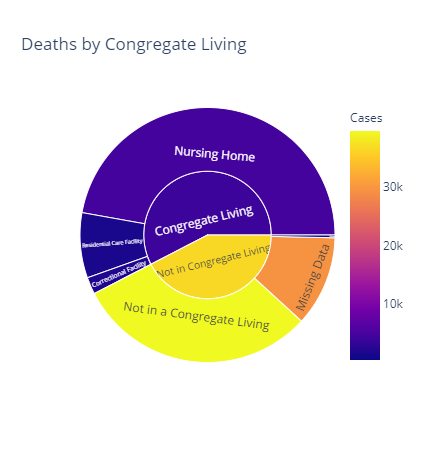

In [140]:
fig = px.sunburst(df.reset_index(), path=['Congregate_Living', 'Living_Situation'], values='Deaths',
                  color='Cases', hover_data=['Deaths'], title = 'Deaths by Congregate Living')
fig.show()

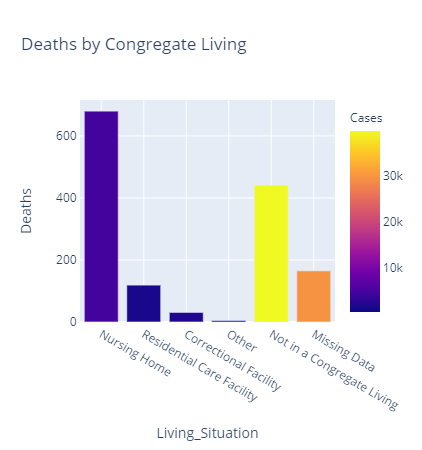

In [141]:
fig = px.bar(df.reset_index(), x='Living_Situation',y = 'Deaths', color = 'Cases', title='Deaths by Congregate Living')
fig.show()
# pio.write_html(fig, file='Deaths_by_CLS.html', auto_open=True)

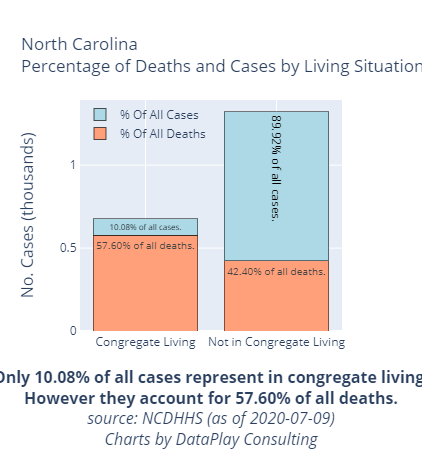

In [142]:
import plotly.graph_objects as go
Total_Cases = '{:.2%}'.format(df_grouped.reset_index()['%TotalCases'][0])
Total_Deaths = '{:.2%}'.format(df_grouped.reset_index()['%TotalDeaths'][0])
Date = dt.date.today()
fig = go.Figure(data=[
    go.Bar(name = '% Of All Deaths', x=df_grouped.reset_index()['Congregate_Living'],
           y = df_grouped.reset_index()['%TotalDeaths'],
           text=['{:.2%}'.format(df_grouped.reset_index()['%TotalDeaths'][0])+' of all deaths.','{:.2%}'.format(df_grouped.reset_index()['%TotalDeaths'][1])+' of all deaths.'],
           marker_color='lightsalmon',
           textposition='inside',marker_line_color='black'),
    
    go.Bar(name = '% Of All Cases', x=df_grouped.reset_index()['Congregate_Living'],
           y = df_grouped.reset_index()['%TotalCases'],
           text=['{:.2%}'.format(df_grouped.reset_index()['%TotalCases'][0])+' of all cases.','{:.2%}'.format(df_grouped.reset_index()['%TotalCases'][1])+' of all cases.'],
           marker_color='lightblue',
           textposition='inside',marker_line_color='black', 
           textfont=dict(color="black"))
])
# Change the bar mode
fig.update_layout(barmode='stack', title = 'North Carolina<br>Percentage of Deaths and Cases by Living Situation',
    yaxis=dict(
        title='No. Cases (thousands)',
        titlefont_size=16,
        tickfont_size=12,
    ),
    xaxis=dict(
        title=f'<b>Only {Total_Cases} of all cases represent in congregate living;<br>However they account for {Total_Deaths} of all deaths.</b><br><i>source: NCDHHS (as of {Date})<br>Charts by DataPlay Consulting</i>',
        titlefont_size=16,
        tickfont_size=12,
    ),              
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ))

fig.show()
pio.write_html(fig, file='Deaths_Cases_Living_Situation.html', auto_open=False)

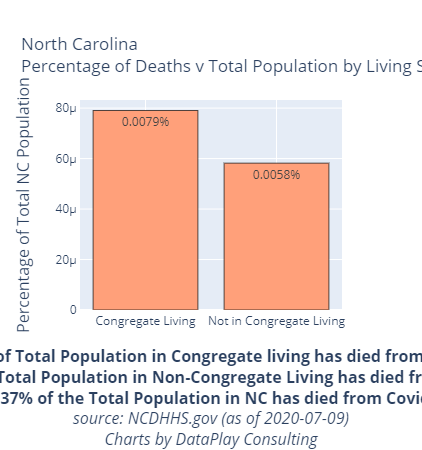

In [143]:
Total_Deaths_Congregate = '{:.4%}'.format(df_grouped.reset_index()['%TotalPopulation'][0])
Total_Deaths_Non_Congregate = '{:.4%}'.format(df_grouped.reset_index()['%TotalPopulation'][1])
Total_Deaths = '{:.4%}'.format(df_grouped.reset_index()['%TotalPopulation'].sum())

fig = go.Figure(data=[
     go.Bar(name = '% Of All Deaths', x=df_grouped.reset_index()['Congregate_Living'],
           y = df_grouped.reset_index()['%TotalPopulation'],
           text=[Total_Deaths_Congregate, Total_Deaths_Non_Congregate],
           marker_color='lightsalmon',
           textposition='inside',marker_line_color='black'),
#     go.Bar(name = '% Of All Cases', x=df_grouped.reset_index()['Congregate_Living'],y = df_grouped.reset_index()['%TotalPop/Cases'],text=['11% of All Cases', '89% of All Cases'],marker_color='lightblue',
#             textposition='inside',marker_line_color='black', textfont=dict(color="black"), hoverinfo='none')
])
# Change the bar mode
fig.update_layout(barmode='group', title = 'North Carolina<br>Percentage of Deaths v Total Population by Living Situation',
    yaxis=dict(
        title='Percentage of Total NC Population',
        titlefont_size=16,
        tickfont_size=12,
    ),
    xaxis=dict(
        title=f"<b>{Total_Deaths_Congregate} of Total Population in Congregate living has died from Covid-19<br> {Total_Deaths_Non_Congregate} of Total Population in Non-Congregate Living has died from Covid-19<br>{Total_Deaths} of the Total Population in NC has died from Covid-19</b><br><i>source: NCDHHS.gov (as of {Date})<br>Charts by DataPlay Consulting</i>",
        titlefont_size=16,
        tickfont_size=12,
    ),              
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ))

fig.show()
pio.write_html(fig, file='DeathsVPopulation.html', auto_open=False)

In [144]:
df_grouped.reset_index()

,Congregate_Living,Cases,Deaths,%ofDeaths,%TotalDeaths,%TotalPopulation,%TotalCases,%TotalPop/Cases
0,Congregate Living,7793,830,5.408050,0.575989,0.000079,0.100802,0.000742
1,Not in Congregate Living,69517,611,48.242193,0.424011,0.000058,0.899198,0.006621


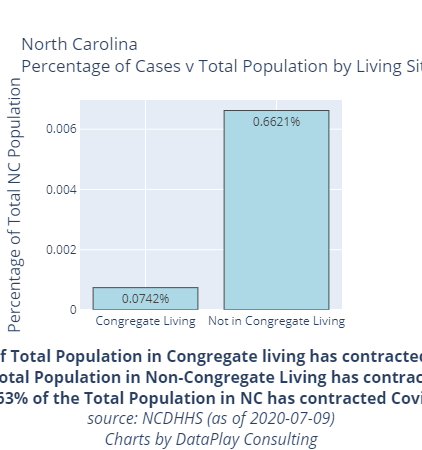

In [145]:
Total_Cases_Congregate = '{:.4%}'.format(df_grouped.reset_index()['%TotalPop/Cases'][0])
Total_Cases_Non_Congregate = '{:.4%}'.format(df_grouped.reset_index()['%TotalPop/Cases'][1])
Total_Cases = '{:.4%}'.format(df_grouped.reset_index()['%TotalPop/Cases'].sum())

fig = go.Figure(data=[
    go.Bar(name = '% Of All Deaths', x=df_grouped.reset_index()['Congregate_Living'],y = df_grouped.reset_index()['%TotalPop/Cases'], text=[Total_Cases_Congregate, Total_Cases_Non_Congregate],marker_color='lightblue',
            textposition='inside',marker_line_color='black')
#     go.Bar(name = '% Of All Cases', x=df_grouped.reset_index()['Congregate_Living'],y = df_grouped.reset_index()['%TotalPop/Cases'],text=['11% of All Cases', '89% of All Cases'],marker_color='lightblue',
#             textposition='inside',marker_line_color='black', textfont=dict(color="black"), hoverinfo='none')
])
# Change the bar mode
fig.update_layout(barmode='group', title = 'North Carolina<br>Percentage of Cases v Total Population by Living Situation',
    yaxis=dict(
        title='Percentage of Total NC Population',
        titlefont_size=16,
        tickfont_size=12,
    ),
    xaxis=dict(
        title=f"<b>{Total_Cases_Congregate} of Total Population in Congregate living has contracted Covid-19<br>{Total_Cases_Non_Congregate} of Total Population in Non-Congregate Living has contracted Covid-19<br>{Total_Cases} of the Total Population in NC has contracted Covid-19</b><br><i>source: NCDHHS (as of {Date})<br>Charts by DataPlay Consulting</i>",
        titlefont_size=16,
        tickfont_size=12,
    ),              
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ))

fig.show()
pio.write_html(fig, file='CasesVPopulation.html', auto_open=False)